## Hypothesis 4 testing

### Do accidents/fatalities increase during cold weather?

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import os

In [17]:
melb_merged = pd.read_csv('cleaned_data/merged_melb_data.csv')
melb_merged.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,T20140013533,Driving accident,Unfinished,2014/07/01,18:05:00,Yes,Collision with vehicle,Monday,REAR END(VEHICLES IN SAME LANE),No,...,3.0,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro,0.4,13.3
1,T20140013680,Driving accident,Finished,2014/07/03,11:00:00,No,No collision and no object struck,Thursday,OFF CARRIAGEWAY TO RIGHT,No,...,0.0,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro,0.0,13.1
2,T20140013898,Driving accident,Finished,2014/07/03,10:30:00,No,Fall from or in moving vehicle,Thursday,FELL IN/FROM VEHICLE,No,...,0.0,0.0,1.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro,0.0,13.1
3,T20140013771,Driving accident,Finished,2014/07/04,17:40:00,No,No collision and no object struck,Thursday,OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT),No,...,0.0,1.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro,0.0,12.8
4,T20140013792,Driving accident,Finished,2014/07/04,23:13:00,Yes,Collision with vehicle,Thursday,RIGHT THROUGH,No,...,1.0,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro,0.0,12.8


In [18]:
#Remove accidents happened due to death of the driver before the accident
melb_merged = melb_merged[melb_merged['ABS_CODE']=='Driving accident']
melb_merged.shape

(3966, 53)

### (a) Road accident frequency (as accident count) against daily max temperature

In [31]:
# Group data by the accident date to find daily values.
grouped_df = melb_merged.groupby(["Date"])

# Assign data to axis: x_axis is max temperature (mean used but all max temperature data values are the same for the same date),
# y_axis is daily accident count  
x_axis = grouped_df["Maximum temperature (Degree C)"].mean()
y_axis = grouped_df["ACCIDENT_NO"].count()

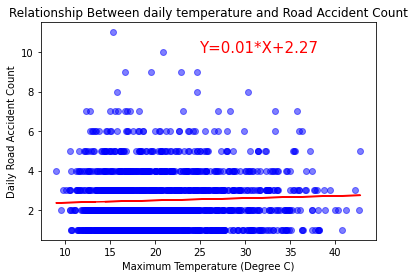

The pvalue of this correlation is 0.0498078946057247


In [34]:
# Use matplotlib to create a scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.title("Relationship Between daily temperature and Road Accident Count")
plt.xlabel("Maximum Temperature (Degree C)")
plt.ylabel("Daily Road Accident Count")

#Create regression line for the data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(x_axis,y_axis)
regress_values = x_axis*slope+intercept
plt.plot(x_axis,regress_values,color='r')
line_eq = 'Y='+str(round(slope,2))+'*X+'+str(round(intercept,2))
plt.annotate(line_eq,(25,10),fontsize=15,color='red')
plt.show()
print('The pvalue of this correlation is '+str(pvalue))
# Save the figure
# plt.savefig(os.path.join("figures",f"Temperature_vs_Accident_Count.png"))